# 2. Random Numbers and Probability

- sampling
- sampling without replacement (dependent)
- sampling with replacement (independent)

In [1]:
import pandas as pd
import numpy as np

amir_deals = pd.read_csv('amir_deals.csv')

In [2]:
# You're in charge of the sales team, and it's time for performance reviews, starting with Amir. As part of the review, you want to randomly select a few of the deals that he's worked on over the past year so that you can look at them more deeply. Before you start selecting deals, you'll first figure out what the chances are of selecting certain deals.

# Count the deals for each product
counts = amir_deals['product'].value_counts()
print(counts)

product
Product B    62
Product D    40
Product A    23
Product C    15
Product F    11
Product H     8
Product I     7
Product E     5
Product N     3
Product G     2
Product J     2
Name: count, dtype: int64


In [3]:
# Calculate the probability of selecting a deal for the different product types by dividing the counts by the total number of deals Amir worked on. Save this as probs.

# Count the deals for each product
counts = amir_deals['product'].value_counts()

# Calculate probability of picking a deal with each product
probs = counts / amir_deals.shape[0]
print(probs)

product
Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: count, dtype: float64


## Sampling

In [4]:
# In the previous exercise, you counted the deals Amir worked on. Now it's time to randomly pick five deals so that you can reach out to each customer and ask if they were satisfied with the service they received. You'll try doing this both with and without replacement.

# Additionally, you want to make sure this is done randomly and that it can be reproduced in case you get asked how you chose the deals, so you'll need to set the random seed before sampling from the deals.

# Set the random seed to 24.
# Take a sample of 5 deals without replacement and store them as sample_without_replacement.

# Set random seed
np.random.seed(24)

# Sample 5 deals without replacement
sample_without_replacement = amir_deals.sample(5)
print(sample_without_replacement)

     Unnamed: 0    product   client status   amount  num_users
127         128  Product B  Current    Won  2070.25          7
148         149  Product D  Current    Won  3485.48         52
77           78  Product B  Current    Won  6252.30         27
104         105  Product D  Current    Won  4110.98         39
166         167  Product C      New   Lost  3779.86         11


In [5]:
# Take a sample of 5 deals with replacement and save as sample_with_replacement.

# Set random seed
np.random.seed(24)

# Sample 5 deals with replacement
sample_with_replacement = amir_deals.sample(5, replace=True)
print(sample_with_replacement)

     Unnamed: 0    product   client status   amount  num_users
162         163  Product D  Current    Won  6755.66         59
131         132  Product B  Current    Won  6872.29         25
87           88  Product C  Current    Won  3579.63          3
145         146  Product A  Current    Won  4682.94         63
145         146  Product A  Current    Won  4682.94         63


## Discrete Distributions

- discrete uniform distribution
- law of large numbers

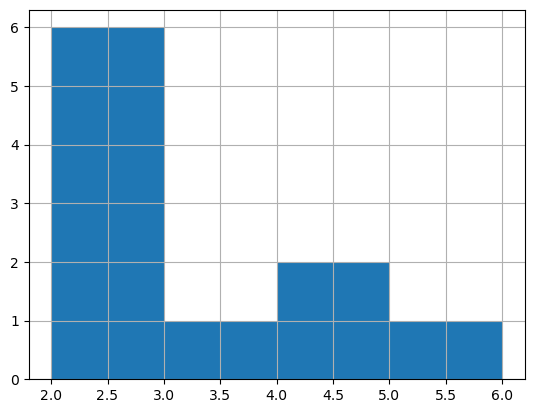

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

groups = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"]
groups_size = [2,4,6,2,2,2,3,2,4,2]
data = {
    "group_id": groups,
    "group_size": groups_size
}
restaurant_groups = pd.DataFrame.from_dict(data)

# Create a histogram of restaurant_groups and show plot
restaurant_groups['group_size'].hist(bins=[2, 3, 4, 5 ,6])
plt.show()

In [18]:
# Count the number of each group_size in restaurant_groups, then divide by the number of rows in restaurant_groups to calculate the probability of randomly selecting a group of each size. Save as size_dist.
# Reset the index of size_dist.
# Rename the columns of size_dist to group_size and prob.

# Create probability distribution
size_dist = (restaurant_groups["group_size"].value_counts()) / (restaurant_groups.shape[0])

# Reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ["group_size", "prob"]

print(size_dist)

   group_size  prob
0           2   0.6
1           4   0.2
2           6   0.1
3           3   0.1


In [19]:
# Calculate the expected value of the size_dist, which represents the expected group size, by multiplying the group_size by the prob and taking the sum.

# Create probability distribution
size_dist = restaurant_groups['group_size'].value_counts() / restaurant_groups.shape[0]
# Reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob']

# Calculate expected value
expected_value = np.sum(size_dist["group_size"] *  size_dist["prob"])
print(expected_value)

2.9000000000000004


In [20]:
# Calculate the probability of randomly picking a group of 4 or more people by subsetting for groups of size 4 or more and summing the probabilities of selecting those groups.

# Create probability distribution
size_dist = restaurant_groups['group_size'].value_counts() / restaurant_groups.shape[0]
# Reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob']

# Expected value
expected_value = np.sum(size_dist['group_size'] * size_dist['prob'])

# Subset groups of size 4 or more
groups_4_or_more = size_dist[size_dist['group_size'] >= 4]

# Sum the probabilities of groups_4_or_more
prob_4_or_more = np.sum(groups_4_or_more['prob'])
print(prob_4_or_more)

0.30000000000000004
